<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [35]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
from scipy.stats import ttest_ind  
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [5]:
boston_df

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


Text(0.5, 0.98, '')

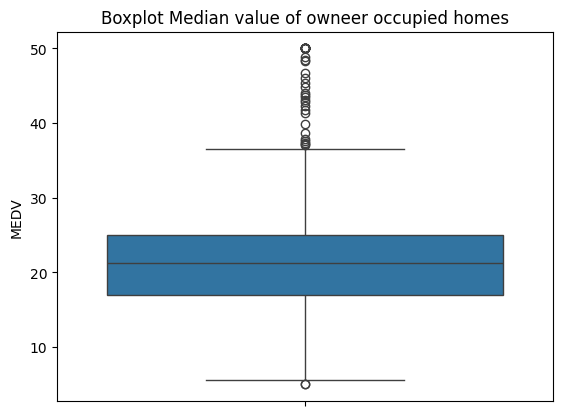

In [27]:
#For the "Median value of owner-occupied homes" provide a boxplot
sns.boxplot(y = 'MEDV', data = boston_df)
pyplot.title('Boxplot Median value of owneer occupied homes')  
pyplot.suptitle('')  


#Interpretation: lots of outliers above, almost none below.

Text(0.5, 0.98, '')

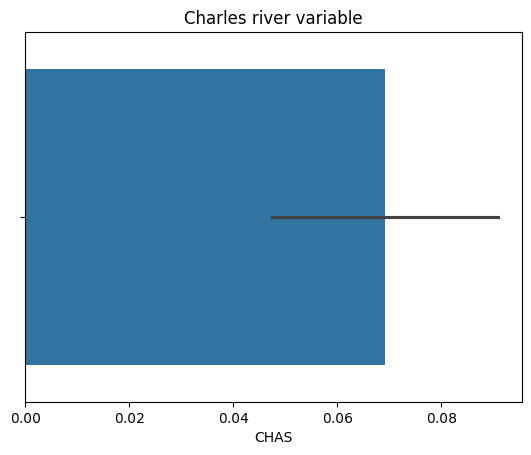

In [28]:
#Provide a  bar plot for the Charles river variable

sns.barplot(x="CHAS", data=boston_df)
pyplot.title('Charles river variable')  
pyplot.suptitle('')  


Text(0, 0.5, 'MEDV')

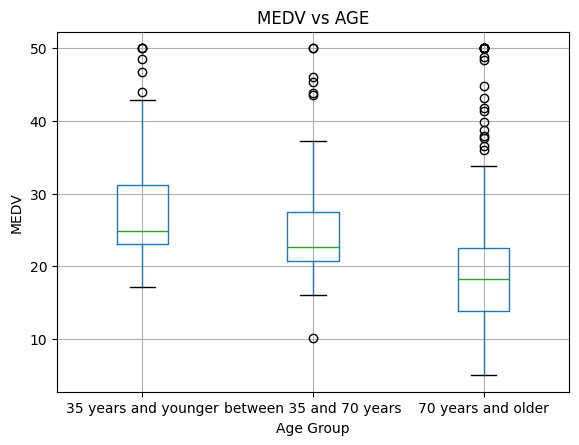

In [18]:
#Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

  
# Discretize the age variable into three groups  
boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older'])  
  
# Create a boxplot  
boston_df.boxplot(column='MEDV', by='age_group')  
  
# Set the plot title and axis labels  
pyplot.title('MEDV vs AGE')  
pyplot.suptitle('')  
pyplot.xlabel('Age Group')  
pyplot.ylabel('MEDV')  

#Interpretation: the younger, the higher is the "Median value of owner-occupied homes in $1000's"

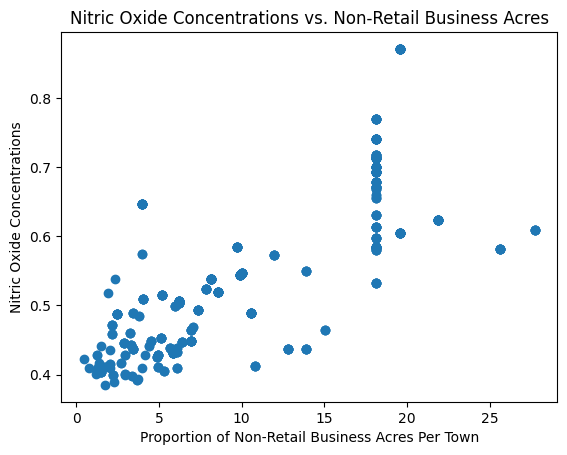

In [22]:
#Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

# Select the variables of interest  
nox = boston_df['NOX']  
indus = boston_df['INDUS']  
  
# Create a scatter plot  
pyplot.scatter(indus, nox)  
  
# Set the plot title and axis labels  
pyplot.title('Nitric Oxide Concentrations vs. Non-Retail Business Acres')  
pyplot.xlabel('Proportion of Non-Retail Business Acres Per Town')  
pyplot.ylabel('Nitric Oxide Concentrations')  
  
# Display the plot  
pyplot.show()  

#Interpretation: positive correlation between the 2 variables

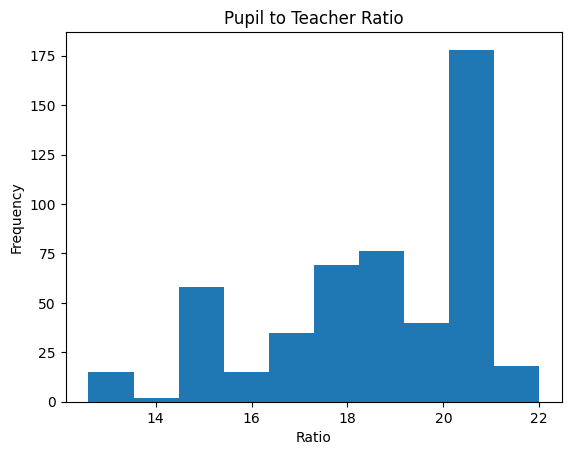

In [24]:
# Select the pupil to teacher ratio variable  
ptratio = boston_df['PTRATIO']  
  
# Create a histogram  
pyplot.hist(ptratio)  
  
# Set the plot title and axis labels  
pyplot.title('Pupil to Teacher Ratio')  
pyplot.xlabel('Ratio')  
pyplot.ylabel('Frequency')  
  
# Display the plot  
pyplot.show()  

#Interpreatation: peak at 21. 

In [36]:
#Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

  
# Select the median value of houses bounded by the Charles river variable  
charles_river_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']  
charles_river_no = boston_df[boston_df['CHAS'] == 0]['MEDV']  
  
# Perform the T-test  
t_statistic, p_value = ttest_ind(charles_river_yes, charles_river_no)  
  
# Print the results  
print("T-test results:")  
print(f"T-statistic: {t_statistic:.2f}")  
print(f"P-value: {p_value:.4f}")  
  
# Check if the difference is significant at a 5% significance level  
if p_value < 0.05:  
    print("There is a significant difference in the median value of houses bounded by the Charles river.")  
else:  
    print("There is no significant difference in the median value of houses bounded by the Charles river.") 

T-test results:
T-statistic: 4.00
P-value: 0.0001
There is a significant difference in the median value of houses bounded by the Charles river.


In [39]:
#Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

from scipy.stats import f_oneway  
  
  
# Group the median value of houses by proportion of owner-occupied units built prior to 1940  
age_groups = boston_df.groupby(pd.cut(boston_df['AGE'], [0, 35, 70, boston_df['AGE'].max()], labels=['35 years and younger', 'between 35 and 70 years', '70 years and older']))  
age_group_medv = [age_groups.get_group(x)['MEDV'] for x in age_groups.groups]  
  
# Perform the ANOVA test  
f_statistic, p_value = f_oneway(*age_group_medv)  
  
# Print the results  
print("ANOVA results:")  
print(f"F-statistic: {f_statistic:.2f}")  
print(f"P-value: {p_value:.4f}")  
  
# Check if the difference is significant at a 5% significance level  
if p_value < 0.05:  
    print("There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")  
else:  
    print("There is no significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.")  

ANOVA results:
F-statistic: 36.41
P-value: 0.0000
There is a significant difference in median values of houses for each proportion of owner-occupied units built prior to 1940.


In [40]:
#Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

from scipy.stats import pearsonr  
  
 
  
# Select the variables of interest  
nox = boston_df['NOX']  
indus = boston_df['INDUS']  
  
# Perform the Pearson correlation test  
corr_coef, p_value = pearsonr(nox, indus)  
  
# Print the results  
print("Pearson correlation results:")  
print(f"Correlation coefficient: {corr_coef:.2f}")  
print(f"P-value: {p_value:.4f}")  
  
# Check if the correlation is significant at a 5% significance level  
if p_value < 0.05:  
    print("There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")  
else:  
    print("There is no significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.")  



Pearson correlation results:
Correlation coefficient: 0.76
P-value: 0.0000
There is a significant relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


In [41]:
#What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)
import statsmodels.api as sm  
  
 
# Select the variables of interest  
medv = boston_df ['MEDV']  
dist = boston_df['DIS']  
  
# Add a constant to the predictor variable  
dist = sm.add_constant(dist)  
  
# Fit the regression model  
model = sm.OLS(medv, dist).fit()  
  
# Print the regression results  
print(model.summary())  

#Since the coefficient is positive and statistically significant (i.e., the p-value is less than 0.05, 
#we can conclude that an additional weighted distance to the five Boston employment centres has a positive impact on the median value of owner-occupied homes.


                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 28 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        12:29:11   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0